In [201]:
# %matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# !python --version

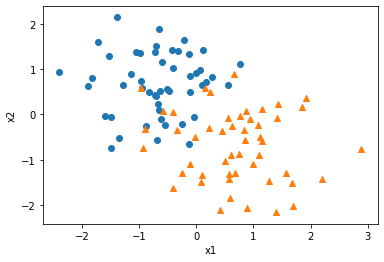

In [202]:
x = np.genfromtxt('ass1_data/data/q3/logisticX.csv', delimiter=',')
y = np.genfromtxt('ass1_data/data/q3/logisticY.csv', delimiter=',')

n = x[0,:].size
m = y.size
        
# normalize
for i in range(n):
    x[:,i] = (x[:,i] - x[:,i].mean()) / x[:,i].std()
    
x1_0 = []
x2_0 = []
x1_1 = []
x2_1 = []
for i in range(m):
    if y[i] == 0:
        x1_0.append(x[i][0])
        x2_0.append(x[i][1])
    else:
        x1_1.append(x[i][0])
        x2_1.append(x[i][1])        
plt.scatter(x1_0, x2_0, marker='o')
plt.scatter(x1_1, x2_1, marker='^')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

x = np.hstack((np.ones((m, 1)), x))
x = x.reshape((m, n+1, 1))
y = y.reshape((m, 1))

In [203]:
def g(z):
    return 1 / (1 + np.exp(-z))

def hypothesis(theta, x):
    return g(np.matmul(theta.T, x))

def LL(theta):
    summation = 0
    for i in range(m):
        summation += y[i]*np.log(hypothesis(theta, x[i])) + (1 - y[i])*np.log(1 - hypothesis(theta, x[i]))
    return summation

def derivative_LL(theta):
    delta = np.zeros((n+1, 1))
    for j in range(n+1):
        summation = 0
        for i in range(m):
            summation += (y[i] - hypothesis(theta, x[i])) * x[i][j]
        delta[j] = summation
    return delta

In [204]:
def hessian(theta):
#     print("hessian")
#     print("theta", theta)
    H = np.zeros((n+1, n+1))
    for j in range(n+1):
        for k in range(j, n+1):
            summation = 0
            for i in range(m):
                summation += hypothesis(theta, x[i])*(1 - hypothesis(theta, x[i])) * x[i][j] * x[i][k]
#             print("val", j, k, summation)
            H[j][k] = summation
            H[k][j] = summation
    return H

In [205]:
def newtons_method(epsilon):
    t = 0
    theta = np.zeros((n+1, 1))
    prev_LL = LL(theta)
    
    while True:
#         theta_t = theta.copy()
#         h = hessian(theta)
#         h_inv = np.linalg.inv(h)
#         dll = derivative_LL(theta)
#         print("nm", t, theta, h, h_inv, dll, LL(theta))
        theta = theta + np.matmul((np.linalg.inv(hessian(theta))), derivative_LL(theta))
        curr_LL = LL(theta)
#         print("diff", LL(theta_t), LL(theta))
        
        if abs(prev_LL - curr_LL) < epsilon or t > 50:
            return theta
        prev_LL = curr_LL
        t += 1

In [206]:
newtons_method(1e-8)

array([[ 0.40125316],
       [ 2.5885477 ],
       [-2.72558849]])

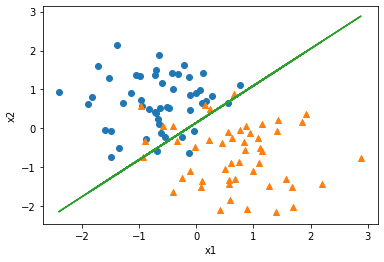

In [199]:
x = np.genfromtxt('ass1_data/data/q3/logisticX.csv', delimiter=',')
y = np.genfromtxt('ass1_data/data/q3/logisticY.csv', delimiter=',')

n = x[0,:].size
m = y.size
        
# normalize
for i in range(n):
    x[:,i] = (x[:,i] - x[:,i].mean()) / x[:,i].std()
    
# theta0 + theta1*x1 + theta2*x2 = 0

def get_x2(theta, x1):
    return -(theta[0] + theta[1]*x1)/theta[2]


theta = np.array([[ 0.40125316],
 [ 2.5885477 ],
 [-2.72558849]])
    
x2_pred = [get_x2(theta, xi) for xi in x[:, 0]]
    
x1_0 = []
x2_0 = []
x1_1 = []
x2_1 = []
for i in range(m):
    if y[i] == 0:
        x1_0.append(x[i][0])
        x2_0.append(x[i][1])
    else:
        x1_1.append(x[i][0])
        x2_1.append(x[i][1])        
plt.scatter(x1_0, x2_0, marker='o')
plt.scatter(x1_1, x2_1, marker='^')
plt.plot(x[:,0], x2_pred, 'C2')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()